# Proyecto 2
Todas las preguntas tienen el mismo peso en esta tarea. Esta tarea requiere más aprendizaje individual. Te invito a consultar la [documentación de pandas](https://pandas.pydata.org/pandas-docs/stable/) para encontrar funciones o métodos que quizás no has usado aún, o realices preguntas en [Stack Overflow](https://stackoverflow.com/) y etiquételos como relacionados con pandas y python. Todas las preguntas tienen la misma cantidad de puntos, excepto la pregunta 1, que vale el 20 % de la calificación de la tarea.

**Nota**: A partir de la pregunta 2 se basan en la respuesta de la pregunta 1.

In [304]:
import pandas as pd
import numpy as np

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings
warnings.filterwarnings('ignore')

### Pregunta 1
Cargue los datos de energía del archivo `assets/Energy Indicators.xls`, que es una lista de indicadores de [suministro de energía y producción de electricidad renovable](assets/Energy%20Indicators.xls) de las [Naciones Unidas](https://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) para el año 2013, y asigna esos datos a un DataFrame con el nombre de variable **energy**.

Ten en cuenta que este es un archivo de Excel y no un archivo de valores separados por comas (.csv). Además, asegúrate de excluir la información del pie de página y del encabezado del archivo de datos. Las primeras dos columnas son innecesarias, por lo que debes deshacerse de ellas. También debes cambiar las etiquetas de las columnas para que las columnas sean las siguientes:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convierta `Energy Supply` a gigajulios (**Nota: hay 1,000,000 giga julios en un petajulio**). Para todos los países que carezcan de datos (por ejemplo, datos con "..."), asegúrese de que estos reflejen valores `np.NaN`.

Cambia el nombre de los siguientes países según este listado (nos servirá para preguntas posteriores):

```
"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"
```

También hay varios países que contienen paréntesis en su nombre. Asegúrete de eliminarlos, por ejemplo: `'Bolivia (Estado Plurinacional de)'` debería ser `'Bolivia'`.

A continuación, carga los datos del GDP (PBI) del archivo `assets/world_bank.csv`. Este es un archivo .csv del [Banco Mundial](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) que contiene el PBI de los países desde 1960 hasta 2015. Llame a este DataFrame **gdp**.

Asegúrete de omitir el encabezado y cambia el nombre de la siguiente lista de países:

```
"Korea, Rep.": "South Korea",
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"
```

Finalmente, lee el [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](https://www.scimagojr.com/countryrank.php?category=2102) desde el archivo `assets/scimagojr-3.xlsx`, que clasifica a los paises según sus contribuciones al área mencionada. Denomina este DataFrame con el nombre **sciamgo**.

Unifica los tres datasets: GDP, Energy, y ScimEn en un nuevo dataset (utilizando la intersección de los nombres de países). Utiliza solo los años del 2006 al 2015 de datos de GDP (PBI) y solo los 15 principales países según el ranking de Scimagojr 'Rank' (del 1 al 15).

El índice de este DataFrame debe ser el nombre de los países, y las columnas deben ser ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

*Esto debería devolver un DataFrame con 20 columnas y 15 entradas, y las filas del DataFrame deberían estar ordenadas por "Rank".*


In [305]:
# Cargar y modificar el archivo Energy indicators
energy = pd.read_excel('assets/Energy Indicators.xls', skiprows=17, skipfooter=38, usecols=[2, 3, 4, 5])
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy.replace('...', np.nan, inplace=True)

# Transformar a gigajulios 
energy['Energy Supply'] *= 1000000 

# Modificar los nombres de los paises
country_renames = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland19": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong",
    "China2": "China",
    "United States of America20": "United States",
    "Japan10": "Japan",
    "France6": "France",
    "Italy9": "Italy",
    "Spain16": "Spain",
    "Australia1": "Australia"
}
energy['Country'] = energy['Country'].replace(country_renames)

# Eliminar los parentesis
energy['Country'] = energy['Country'].str.replace(r" \(.*\)", "", regex=True)

# Cargar y modificar el archivo de world bank
gdp = pd.read_csv('assets/world_bank.csv', skiprows=4)
gdp.rename(columns={'Country Name': 'Country'}, inplace=True)
gdp_country_renames = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gdp['Country'] = gdp['Country'].replace(gdp_country_renames)

# Filtrar los años 2006 a 2015
gdp = gdp[['Country'] + [str(year) for year in range(2006, 2016)]]

# Cargar el archivo ScimEn
sciamgo = pd.read_excel('assets/scimagojr-3.xlsx')

# Seleccionar los 15 países principales en el ranking
sciamgo_top15 = sciamgo[sciamgo['Rank'] <= 15]

# Unir los DataFrames
merged_df = pd.merge(pd.merge(sciamgo_top15, energy, on='Country', how='inner'), gdp, on='Country', how='inner')

# Ordenar por el rank
final_df = merged_df.sort_values('Rank')

# Mostrar el DataFrame 
print("Final DataFrame shape:", final_df.shape)
print(final_df.head())

# Denominar el dataframe como df
df = final_df 

Final DataFrame shape: (15, 21)
   Rank             Country  Documents  Citable documents  Citations  \
0     1               China     127050             126767     597237   
1     2       United States      96661              94747     792274   
2     3               Japan      30504              30287     223024   
3     4      United Kingdom      20944              20357     206091   
4     5  Russian Federation      18534              18301      34266   

   Self-citations  Citations per document  H index  Energy Supply  \
0          411683                    4.70      138   1.271910e+11   
1          265436                    8.20      230   9.083800e+10   
2           61554                    7.31      134   1.898400e+10   
3           37874                    9.84      139   7.920000e+09   
4           12422                    1.85       57   3.070900e+10   

   Energy Supply per Capita  ...          2006          2007          2008  \
0                      93.0  ...  3.992331

### Pregunta 2
La pregunta anterior unió tres datasets y luego los redujo a las 15 entradas principales. Pero antes de reducirlos a los 15 elementos principales, ¿cuántas entradas se perdieron?

*Esta función debería devolver un solo número.*

In [306]:
# Cantidad total de entradas antes de la reducción
sciamgo_total = sciamgo
merged_df_2 = pd.merge(pd.merge(sciamgo_total, energy, on='Country', how='inner'), gdp, on='Country', how='inner')
total_entries_before = merged_df_2.shape[0]

# Reduce a las 15 entradas principales 
top_15_df = final_df.nlargest(15, 'Rank') 

# Cantidad de entradas después de la reducción
total_entries_after = top_15_df.shape[0]

# Calcular entradas perdidas
entries_lost = total_entries_before - total_entries_after

# Devuelve el número de entradas perdidas
entries_lost

135

In [307]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Todo menos esto!</text>
</svg>

### Pregunta 3
¿Cuáles son los 15 países con mayor GDP (PBI) promedio en los últimos 10 años?

*Esta función debería devolver una serie llamada `avgGDP` con 15 países y su GDP (PBI) promedio ordenado en orden descendente.*

In [320]:
# Calcular el promedio del GDP para cada país en los últimos 10 años

gdp_2 = gdp[['Country'] + [str(year) for year in range(2006, 2015)]]
gdp_2['Avg_GDP'] = gdp_2[[str(year) for year in range(2006, 2015)]].mean(axis=1)

# Seleccionar los 15 países con el mayor promedio de GDP
avgGDP = gdp_2[['Country', 'Avg_GDP']].nlargest(15, 'Avg_GDP')

# Mostrar la serie con los 15 países y su promedio de GDP
avgGDP

,Country,Avg_GDP
257,World,6.629398e+13
92,High income,4.554749e+13
179,OECD members,4.484487e+13
195,Post-demographic dividend,4.265837e+13
100,IDA & IBRD total,2.148847e+13
62,Europe & Central Asia,2.106957e+13
138,Low & middle income,2.029316e+13
154,Middle income,2.000268e+13
99,IBRD only,1.990360e+13
70,European Union,1.710770e+13


### Pregunta 4
¿Cuánto cambió el GDP (PBI) durante el lapso de 10 años para el país con el sexto GDP (PBI) promedio más grande?

*Esta función debería devolver un solo número.*

In [325]:
# Calcular el GDP promedio para cada país

gdp_2['Avg_GDP'] = gdp_2[[str(year) for year in range(2006, 2015)]].mean(axis=1)

# Obtener el país con el sexto GDP promedio más alto

avgGDP_6_country = gdp_2.nlargest(6, 'Avg_GDP').iloc[5]  

# Obtener el cambio en el GDP durante los 10 años

gdp_change = avgGDP_6_country[str(2014)] - avgGDP_6_country[str(2006)]

# Mostrar el cambio en el GDP

gdp_change

# Convertir el cambio en GDP a miles de millones
gdp_change_billions = gdp_change / 1_000_000_000
print(f"Cambio en el GDP en miles de millones: {gdp_change_billions:.2f} miles de millones")

Cambio en el GDP en miles de millones: 1464.99 miles de millones


### Pregunta 5
¿Cuál es el suministro medio de energía per cápita (`Energy Supply per Capita`)?

*Esta función debería devolver un solo número.*

In [327]:
# Calcular la media de Energy supply per capita

energy_mean_p_c = energy['Energy Supply per Capita'].mean()

# Mostrar el resultado
energy_mean_p_c
print(f"El promedio de energía per cápita es {energy_mean_p_c:.2f} GJ")


El promedio de energía per cápita es 90.67 GJ


### Pregunta 6
¿Qué país tiene el máximo `% Renewable` y cuál es el porcentaje?

*Esta función debe devolver una tupla con el nombre del país y el porcentaje.*

In [330]:
# Ver el país con el máximo porcentaje de energía renovable

max_renewable_country = energy.loc[energy['% Renewable'].idxmax()]

# Definir el nombre del país y el porcentaje

country_name = max_renewable_country['Country']
renewable_percentage = float(max_renewable_country['% Renewable'])

# Devolver la tupla con el país y el porcentaje

result = (country_name, renewable_percentage)

# Imprimir el resultado

print(result)

('Albania', 100.0)


### Pregunta 7
Cree una nueva columna que sea la relación entre `Self-Citations` y `Total Citations`.
¿Cuál es el valor máximo para esta nueva columna y qué país tiene la relación más alta?

*Esta función debe devolver una tupla con el nombre del país y el ratio (proporción).*

In [337]:
# Crear una nueva columna que sea la relación entre 'Self-citations' y 'Citations', asumiendo que 'Citations' es el total
sciamgo['Self-citation Ratio'] = sciamgo['Self-citations'] / sciamgo['Citations']

# Encontrar el valor máximo de la nueva columna
max_ratio_row = sciamgo.loc[sciamgo['Self-citation Ratio'].idxmax()]

# Definir el nombre del país y el valor máximo de la relación
country_name_max_ratio = max_ratio_row['Country']
max_ratio = float(max_ratio_row['Self-citation Ratio'])

# Devolver la tupla con el país y el ratio
result = (country_name_max_ratio, max_ratio)
print(result)

('French Guiana', 1.0)


### Pregunta 8

Crea una columna que estime la población utilizando `Energy Supply` y `Energy Supply per capita`.
¿Cuál es el tercer país más poblado según esta estimación?

*Esta función debería devolver el nombre del país*

In [338]:
# Crear una nueva columna que estime la población
energy['Estimated Population'] = energy['Energy Supply'] / energy['Energy Supply per Capita']

# Encontrar el tercer país más poblado
third_most_populated_country = energy.nlargest(3, 'Estimated Population')['Country'].iloc[2]

# Imprimir el resultado
print(f"El tercer país más poblado según la estimación es {third_most_populated_country}.")

El tercer país más poblado según la estimación es United States.


### Pregunta 9
Crea una columna que estime el número de `Citable documents` por persona.
¿Cuál es la correlación entre el número de `Citable documents` per cápita y el `Energy Supply per Capita`? Utiliza el método `.corr()`, (correlación de Pearson).

*Esta función debería devolver un solo número.*

*(Opcional: utiliza la función `plot9()` para visualizar la relación entre el suministro de energía per cápita y los `Citable documents` per cápita)*

In [344]:
# Estimar la población como se hizo anteriormente
energy['Estimated Population'] = energy['Energy Supply'] / energy['Energy Supply per Capita']

# Crear una nueva columna que calcule los Citable documents por persona
sciamgo['Citable documents per Capita'] = sciamgo['Citable documents'] / energy['Estimated Population']

# Calcular la correlación entre Citable documents per Capita y Energy Supply per Capita
correlation = sciamgo['Citable documents per Capita'].corr(energy['Energy Supply per Capita'])

# Imprimir el resultado
print(f"La correlación entre Citable documents per cápita y Energy Supply per cápita es {correlation:.2f}.")

La correlación entre Citable documents per cápita y Energy Supply per cápita es nan.


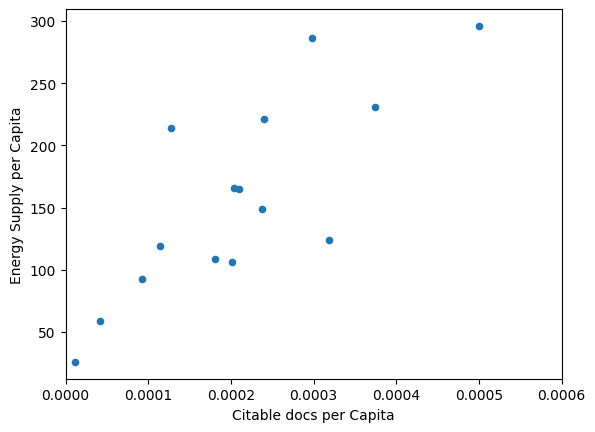

In [343]:
def plot9():
    import matplotlib as plt
    %matplotlib inline

    top15 = df  # df debe ser el nombre del DataFrame que obtuviste en la pregunta 1
    top15['PopEst'] = top15['Energy Supply'] / top15['Energy Supply per Capita']
    top15['Citable docs per Capita'] = top15['Citable documents'] / top15['PopEst']
    top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

plot9()

### Pregunta 10
Crea una nueva columna con un valor igual a 1 si el valor de % de energía renovable del país (`% Renewable`) es igual o superior de la mediana de todos los países en el top 15, o con un valor igual a 0 si el valor de % de energía renovable del país (`% Renewable`) está por debajo de la mediana.

*Esta función debería devolver una serie llamada `HighRenew` cuyo índice es el nombre del país ordenado ascendentemente según el ranking.*

In [347]:
# Ordenar el DataFrame por '% Renewable' en orden descendente para obtener el top 15
top_15_energy = energy.nlargest(15, '% Renewable')

# Calcular la mediana del '% Renewable' en el top 15
median_renewable = top_15_energy['% Renewable'].median()

# Crear la nueva columna 'HighRenew' con 1 si el valor de '% Renewable' es >= a la mediana, 0 si es menor
energy['HighRenew'] = (energy['% Renewable'] >= median_renewable).astype(int)

# Ordenar el DataFrame
energy_sorted = energy.sort_index()

# Mostrar el resultado
print(energy_sorted[['Country', '% Renewable', 'HighRenew']])

                       Country  % Renewable  HighRenew
0                  Afghanistan     78.66928          0
1                      Albania    100.00000          1
2                      Algeria      0.55101          0
4                      Andorra     88.69565          0
5                       Angola     70.90909          0
..                         ...          ...        ...
222                   Viet Nam     45.32152          0
223  Wallis and Futuna Islands      0.00000          0
224                      Yemen      0.00000          0
225                     Zambia     99.71467          1
226                   Zimbabwe     52.53612          0

[222 rows x 3 columns]


### Pregunta 11
Utiliza el siguiente diccionario para agrupar los países por continente, luego crea un DataFrame que muestre el tamaño de la muestra (la cantidad de países en cada contenedor de continente) y la suma, la media y la desviación estándar para la población estimada de cada país.

```python
continent_dict  = {'China':'Asia',
                   'United States':'North America',
                   'Japan':'Asia',
                   'United Kingdom':'Europe',
                   'Russian Federation':'Europe',
                   'Canada':'North America',
                   'Germany':'Europe',
                   'India':'Asia',
                   'France':'Europe',
                   'South Korea':'Asia',
                   'Italy':'Europe',
                   'Spain':'Europe',
                   'Iran':'Asia',
                   'Australia':'Australia',
                   'Brazil':'South America'}
```

*Esta función debería devolver un DataFrame con un índice llamado Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` y columnas `['size', 'sum', 'mean', 'std']`*

In [351]:
import pandas as pd

# Diccionario de continentes por país
continent_dict = {'China': 'Asia',
                  'United States': 'North America',
                  'Japan': 'Asia',
                  'United Kingdom': 'Europe',
                  'Russian Federation': 'Europe',
                  'Canada': 'North America',
                  'Germany': 'Europe',
                  'India': 'Asia',
                  'France': 'Europe',
                  'South Korea': 'Asia',
                  'Italy': 'Europe',
                  'Spain': 'Europe',
                  'Iran': 'Asia',
                  'Australia': 'Australia',
                  'Brazil': 'South America'}

energy['Estimated Population'] = energy['Energy Supply'] / energy['Energy Supply per Capita']
sciamgo_top15 = sciamgo[sciamgo['Rank'] <= 15]

data = {'Country': ['China', 'United States', 'Japan', 'United Kingdom', 'Russian Federation',
                    'Canada', 'Germany', 'India', 'France', 'South Korea', 'Italy', 'Spain', 
                    'Iran', 'Australia', 'Brazil'],
        'Estimated Population': []}
 
energy = pd.DataFrame(data)

# Asignar los continentes usando el diccionario
energy['Continent'] = energy['Country'].map(continent_dict)

# Paso 1: Agrupar por continente y calcular las estadísticas
continent_stats = energy.groupby('Continent')['Estimated Population'].agg(
    size='size',        # Tamaño de la muestra
    sum='sum',          # Suma de la población
    mean='mean',        # Media de la población
    std='std'           # Desviación estándar de la población
)

# Mostrar el resultado
print(continent_stats)


ValueError: All arrays must be of the same length

### Optional

Puedes ejecutar la función `plot_optional()` para ver un ejemplo de visualización.

Este es un ejemplo de visualización realizado para ayudarte a comprender los datos. 
Este es un gráfico de burbujas que muestra el % Renewable vs. Rank. 
El tamaño de la burbuja corresponde al GDP (PIB) de 2014 de los países, y el color corresponde al continente.


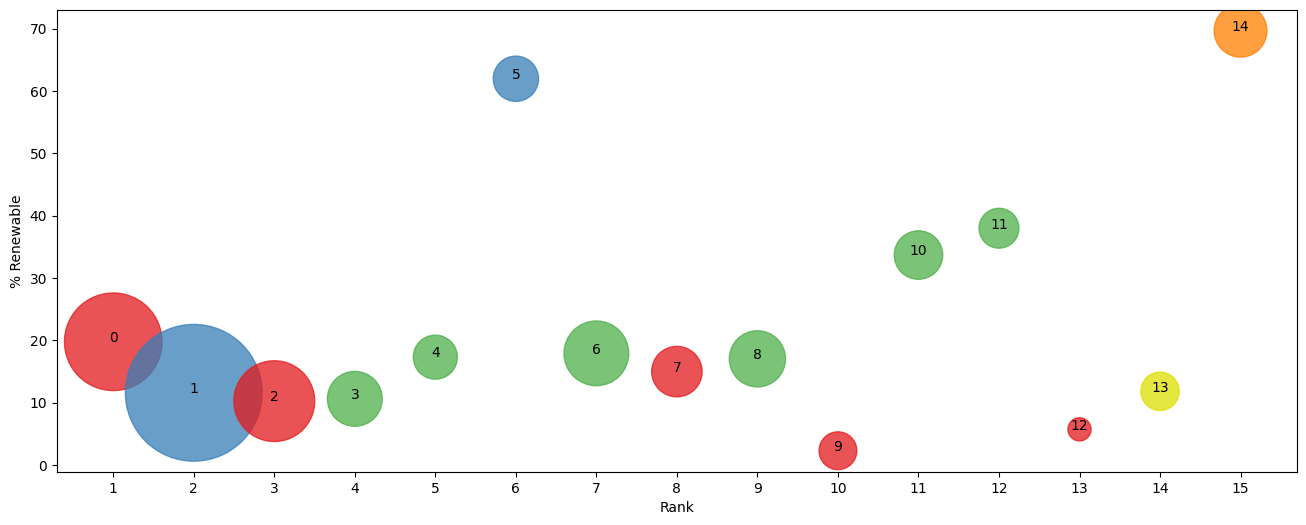

In [349]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    top15 = df  # df debe ser el nombre del DataFrame que obtuviste en la pregunta 1
    ax = top15.plot(x='Rank', y='% Renewable', kind='scatter',
                    c=['#e41a1c', '#377eb8', '#e41a1c', '#4daf4a',
                       '#4daf4a', '#377eb8', '#4daf4a', '#e41a1c',
                       '#4daf4a', '#e41a1c', '#4daf4a', '#4daf4a',
                       '#e41a1c', '#dede00', '#ff7f00'],
                    xticks=range(1, 16), s=6 * top15['2014'] / 10 ** 10,
                    alpha=.75, figsize=[16, 6])

    for i, txt in enumerate(top15.index):
        ax.annotate(txt, [top15['Rank'][i], top15['% Renewable'][i]], ha='center')

    print(
        """Este es un ejemplo de visualización realizado para ayudarte a comprender los datos. \nEste es un gráfico de burbujas que muestra el % Renewable vs. Rank. \nEl tamaño de la burbuja corresponde al GDP (PIB) de 2014 de los países, y el color corresponde al continente.""")


plot_optional()